In [1]:
import cv2
import numpy as np
from skimage import io
from matplotlib import pyplot as plt

In [2]:
image = cv2.imread('cvbook.jpg')

In [ ]:
(r,c) = image.shape[:2]
pts1 = np.float32([[241,6],[726,29],[6,668],[627,837]])
pts2 = np.float32([[0,0],[300,0],[0,400],[300,400]])

## Calculate Perspective transform matrix from 4 points before transformation and 4 points after transformation

In [ ]:
def calculate_perspective_transform_matrix(points_before, points_after):
    rows=[]
    for i in range(4):
        xa, ya = points_before[i]
        xb, yb = points_after[i]
        row = np.array([[-xa, -ya, -1, 0, 0, 0, xa * xb, ya * xb, xb],
                  [0, 0, 0, -xa, -ya, -1, xa*yb, ya * yb, yb]])
        rows.append(row)
    rows.append(np.array([0, 0, 0, 0, 0, 0, 0, 0, 1]))
    M1 = np.vstack(rows)
    u, s, v = np.linalg.svd(M1)
    C = v.T[:, 8].reshape((3, 3))
    return C

In [5]:
M = calculate_perspective_transform_matrix(pts1, pts2)

In [6]:
dst = cv2.warpPerspective(image,M,(300, 400))

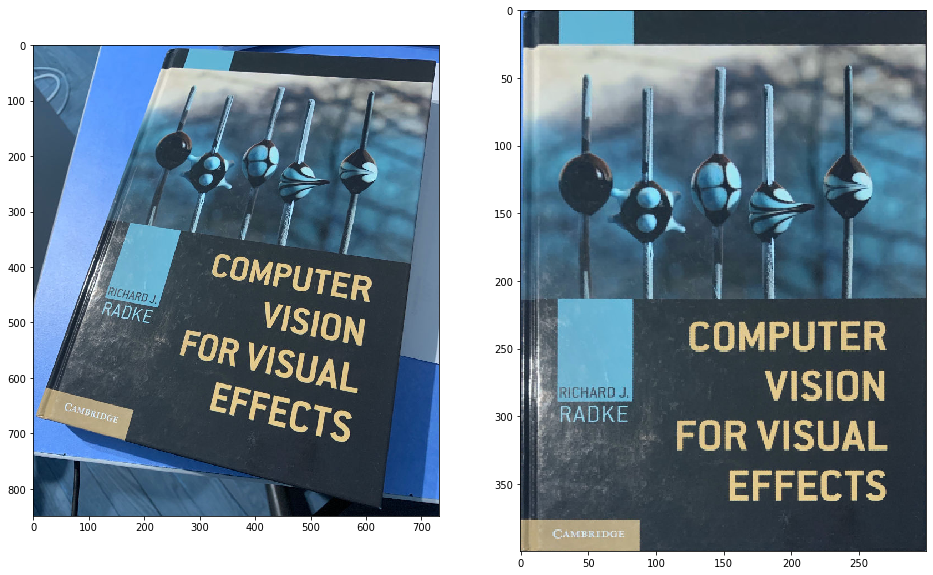

In [8]:
plt.figure(figsize=(16, 16))
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.subplot(1, 2, 2)
plt.imshow(dst)

## Using opencv

In [9]:
M = cv2.getPerspectiveTransform(pts1, pts2)

In [10]:
dst = cv2.warpPerspective(image,M,(300, 400))

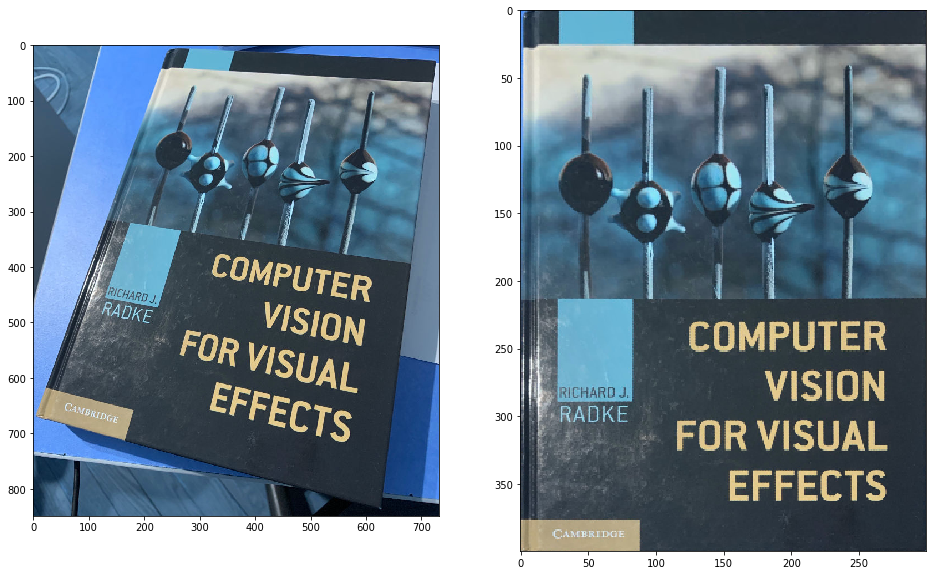

In [11]:
plt.figure(figsize=(16, 16))
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.subplot(1, 2, 2)
plt.imshow(dst)